In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import multivariate_normal
import seaborn as sns

$\frac{ \hat{v}_j Z }{ \sqrt{\hat{\lambda}_j}}$ should behave like standard normal for all eigenvalues if the fitting model is true.

In [5]:
def my_sim1(x_min=0, y_min=0, x_max=100, y_max=100, n=500, theta=3, range_val=5, cov_index=1):

    # Specify the number of points along each axis
    num_points_x, num_points_y = n, n

    # Generate a regular grid using linspace
    x = np.linspace(x_min, x_max, num_points_x)
    y = np.linspace(y_min, y_max, num_points_y)
    
    d = np.sqrt( (x[:, None] - x)**2 + (y[:, None] - y)**2 )  + 1e-8

    # 1) 
    cov_mat1 = theta * np.exp(-d/range_val)
    cov_mat2 = theta * np.exp( -(d/range_val)**2)
    cov_mat3 = theta * (1 + d/range_val) * np.exp(-d/range_val)

    cov_list = [cov_mat1, cov_mat2, cov_mat3]

    eigen_values_1, eigenvectors_1 = np.linalg.eig(cov_mat1)
    eigen_values_2, eigenvectors_2 = np.linalg.eig(cov_mat2)
    eigen_values_3, eigenvectors_3 = np.linalg.eig(cov_mat3)

    np.random.seed(42)
    sim_data = multivariate_normal(mean=np.zeros(n), cov=cov_list[cov_index]).rvs()
    # multivariate_normal is a function from scipy.stats module 
    #. rvs() generate random samples from specifed function
    # .T transpose 

    tmp1 = np.zeros(n)
    tmp2 = np.zeros(n)
    tmp3 = np.zeros(n)

    for i in range(n):
        tmp1[i] = np.dot(np.transpose(eigenvectors_1[:, i]), sim_data) / eigen_values_1[i]**(1/2)
        tmp2[i] = np.dot(np.transpose(eigenvectors_2[:, i]), sim_data) / eigen_values_2[i]**(1/2)
        tmp3[i] = np.dot(np.transpose(eigenvectors_3[:, i]), sim_data) / eigen_values_3[i]**(1/2)
        tmp1[i] = np.log(tmp1[i]**2)
        tmp2[i] = np.log(tmp2[i]**2)
        tmp3[i] = np.log(tmp3[i]**2)

    data = pd.DataFrame({'x': np.arange(1, n+1), 'y1': tmp1, 'y2': tmp2, 'y3': tmp3})

 
    # Assuming data is already defined

    plt.figure(figsize=(15, 5))

    # Line 1
    sns.scatterplot(x='x', y='y1', data=data, alpha=0.7, color='red', label='Exponential')
    sns.regplot(x='x', y='y1', data=data, scatter=False, color='red')
    plt.xlim(0, data['x'].max() + 1)  # Adjust the xlim as needed

    # Line 2
    sns.scatterplot(x='x', y='y2', data=data, alpha=0.7, color='green', label='Squared exponential')
    sns.regplot(x='x', y='y2', data=data, scatter=False, color='green')
    plt.xlim(0, data['x'].max() + 1)  # Adjust the xlim as needed

    # Line 3
    sns.scatterplot(x='x', y='y3', data=data, alpha=0.7, color='blue', label='Matern(3/2)')
    sns.regplot(x='x', y='y3', data=data, scatter=False, color='blue')
    plt.xlim(0, data['x'].max() + 1)  # Adjust the xlim as needed

    # Add labels, title, and legend
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis (log scaled)')
    plt.title('Smoothed Lines for y1,y2 and y3')
    plt.legend()

    plt.tight_layout()
    plt.show()


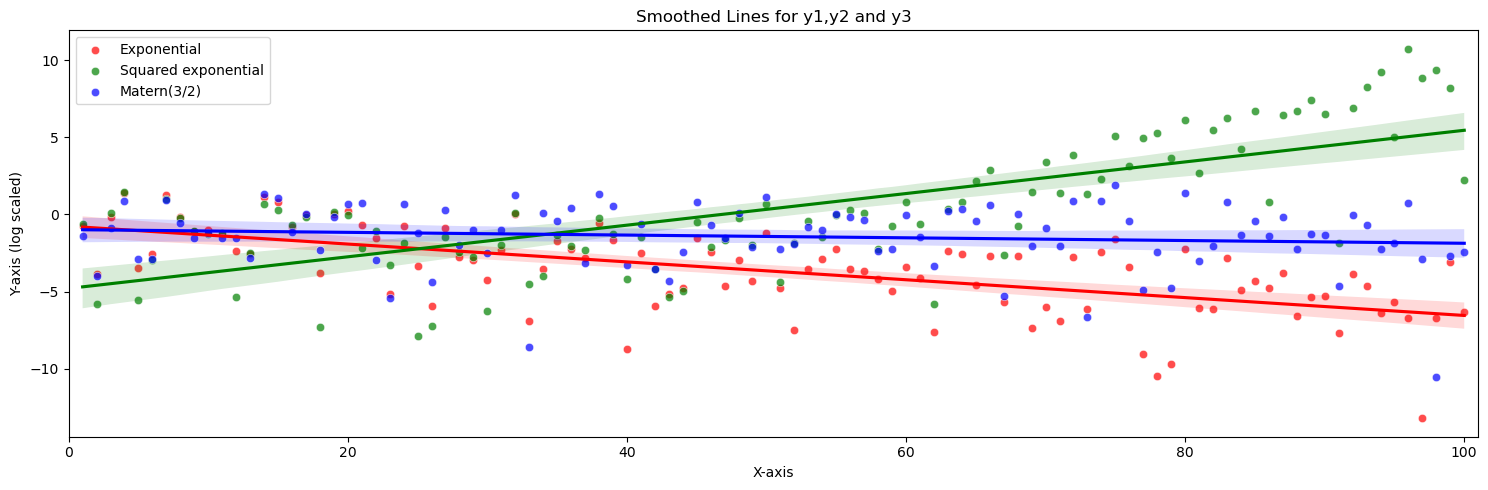

In [6]:
# Example usage
my_sim1(x_min=0, y_min=0, x_max=100, y_max=100, n=100, theta=3, range_val=4, cov_index=2)

In [31]:
def my_sim2(x_min=0, y_min=0, x_max=100, y_max=100, n=500, theta=3, range_val=5, cov_index=1):

    # Specify the number of points along each axis
    num_points_x, num_points_y = n, n

    # Generate a regular grid using linspace
    x = np.linspace(x_min, x_max, num_points_x)
    y = np.linspace(y_min, y_max, num_points_y)
    
    d = np.sqrt( (x[:, None] - x)**2 + (y[:, None] - y)**2 )  + 1e-8

    # 1) 
    cov_mat1 = theta * np.exp(-d/range_val)
    cov_mat2 = theta * np.exp( -(d/range_val)**2)
    cov_mat3 = theta * (1 + d/range_val) * np.exp(-d/range_val)

    cov_list = [cov_mat1, cov_mat2, cov_mat3]

    eigen_values_1, eigenvectors_1 = np.linalg.eig(cov_mat1)
    eigen_values_2, eigenvectors_2 = np.linalg.eig(cov_mat2)
    eigen_values_3, eigenvectors_3 = np.linalg.eig(cov_mat3)

    # np.random.seed(42)
    sim_data = multivariate_normal(mean=np.zeros(n), cov=cov_list[cov_index]).rvs()
    # multivariate_normal is a function from scipy.stats module 
    #. rvs() generate random samples from specifed function
    # .T transpose 

    tmp1 = np.zeros(n)
    tmp2 = np.zeros(n)
    tmp3 = np.zeros(n)

    for i in range(n):
        tmp1[i] = np.dot(np.transpose(eigenvectors_1[:, i]), sim_data) / eigen_values_1[i]**(1/2)
        tmp2[i] = np.dot(np.transpose(eigenvectors_2[:, i]), sim_data) / eigen_values_2[i]**(1/2)
        tmp3[i] = np.dot(np.transpose(eigenvectors_3[:, i]), sim_data) / eigen_values_3[i]**(1/2)
 
    data = pd.DataFrame({'x': np.arange(1, n+1), 'y1': tmp1, 'y2': tmp2, 'y3': tmp3})
    print(f'Data is generated from mod{cov_index+1}')
    print(f'When fitted with mod1, mean of the statistic is {np.mean(tmp1)} and the variance is {np.var(tmp1)}')
    print(f'When fitted with mod2, mean of the statistic is {np.mean(tmp2)} and the variance is {np.var(tmp2)}')
    print(f'When fitted with mod3, mean of the statistic is {np.mean(tmp3)} and the variance is {np.var(tmp3)}')

my_sim2(x_min=0, y_min=0, x_max=100, y_max=100, n=500, theta=3, range_val=5, cov_index=2)


Data is generated from mod3
When fitted with mod1, mean of the statistic is -0.0026623522149288666 and the variance is 0.05814132606804369
When fitted with mod2, mean of the statistic is -30.497270624254206 and the variance is 597366.9659884818
When fitted with mod3, mean of the statistic is 0.032196962240891774 and the variance is 0.9146869503263446
